4    428540.218490
5    352449.162569
6    276358.106648
7    200267.050727
8    124175.994805
dtype: float64


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<module 'matplotlib.pyplot' from 'C:\\ProgramData\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

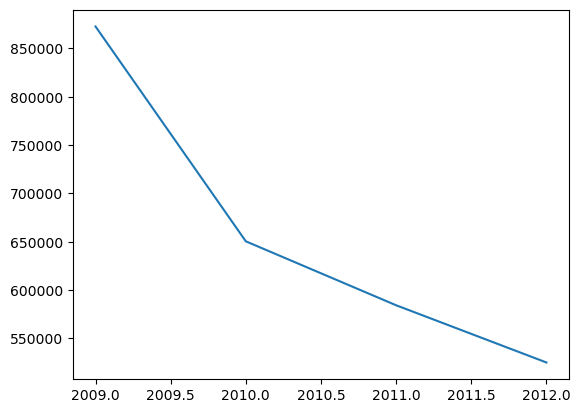

In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

data = pd.DataFrame({
'Year': [2009, 2010, 2011, 2012],
'Sales': [872770, 650451, 584282, 525073]
})

data = data.set_index('Year')
model = sm.tsa.ExponentialSmoothing(data, trend = 'add', seasonal = None)
results = model.fit()
forecast = results.forecast(steps = 5)
print (forecast)

plt.plot(data)
plt

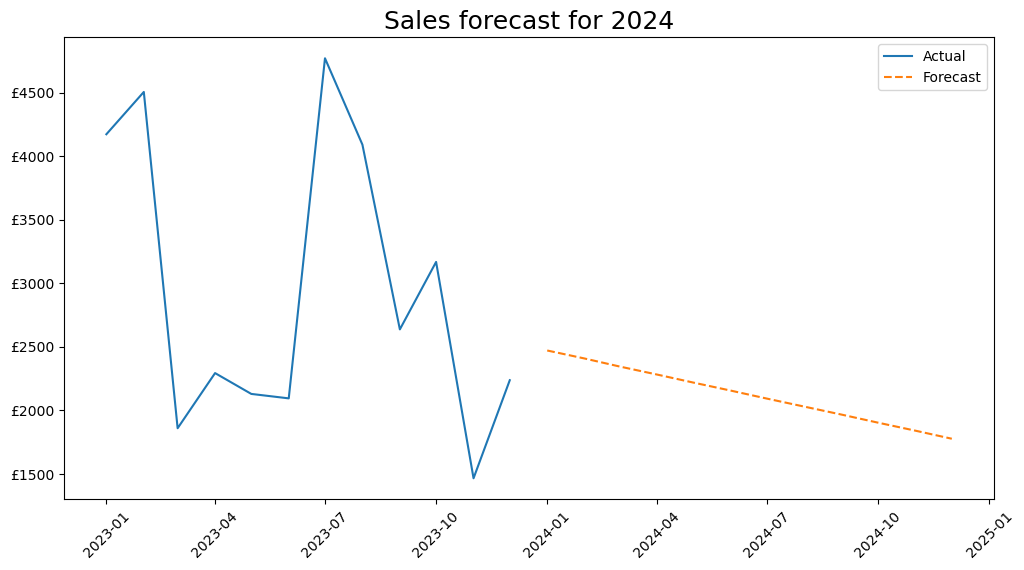

0.004997009691664125

In [4]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter # £ signs on graph
%matplotlib inline
np.random.seed(42) # numebrs gerneated the same 

df = pd.DataFrame({
    'sales': np.random.randint(1000, 5000, size=12)
}, index=pd.date_range(start='2023-01-01', periods=12, freq='MS'))

model = sm.tsa.ExponentialSmoothing(df['sales'], trend='add', seasonal=None)
results = model.fit()
forecast = results.forecast(steps=12) 
def pound_formatter(x, pos):
    return f'£{int(x)}'

plt.figure(figsize=(12,6))
plt.plot(df, label='Actual')
plt.plot(forecast, label='Forecast', linestyle='--')
plt.legend()
plt.gca().yaxis.set_major_formatter(FuncFormatter(pound_formatter))
plt.xticks(rotation=45)
plt.title('Sales forecast for 2024', fontsize=18)
plt.show()

results.params['smoothing_level']  # 0 = weighted to older and 1 = weighted to zero